In [4]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
%matplotlib inline

/home/riv/.local/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


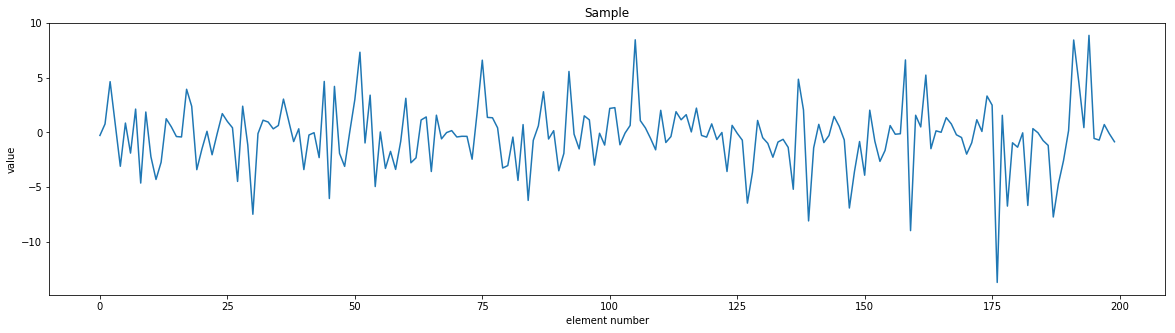

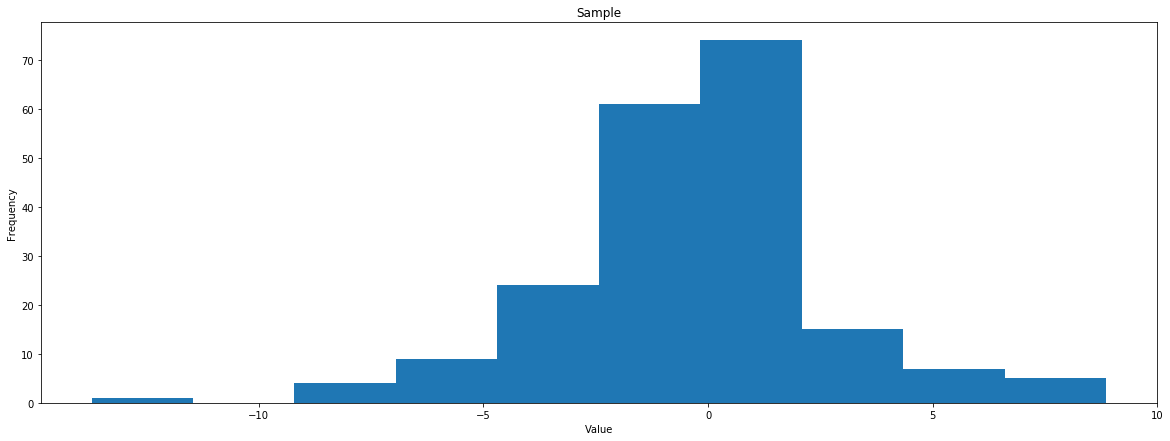

In [3]:
sample = []
f = open('70.txt')
line = f.readline()
while line:
    sample.append(float(line)),
    line = f.readline()
f.close()



plt.figure(figsize=(20,5))
plt.plot(range(len(sample)),sample)
plt.xlabel("element number")
plt.ylabel("value")
plt.title("Sample")
plt.show()

plt.figure(figsize=(20,7))
plt.hist(sample)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Sample")
plt.show()

$H_0: Q \in \mathcal{P}, \mathcal{P} = \{Laplace(\theta)|\theta \in (0,\infty)\}$

$\operatorname{D}x_i=\frac{2}{\theta^{2}}$

Значит, оценка метода моментов: $\theta^* = \frac{2}{Var(X)}$

In [10]:
splits = [[],[]]
estimation = []
N_splits = 100
for i in range(N_splits):
    train, test = train_test_split(sample, test_size=0.5, random_state = i)
    splits[0].append(train)
    splits[1].append(test)
    estimation.append(2 / np.var(train))

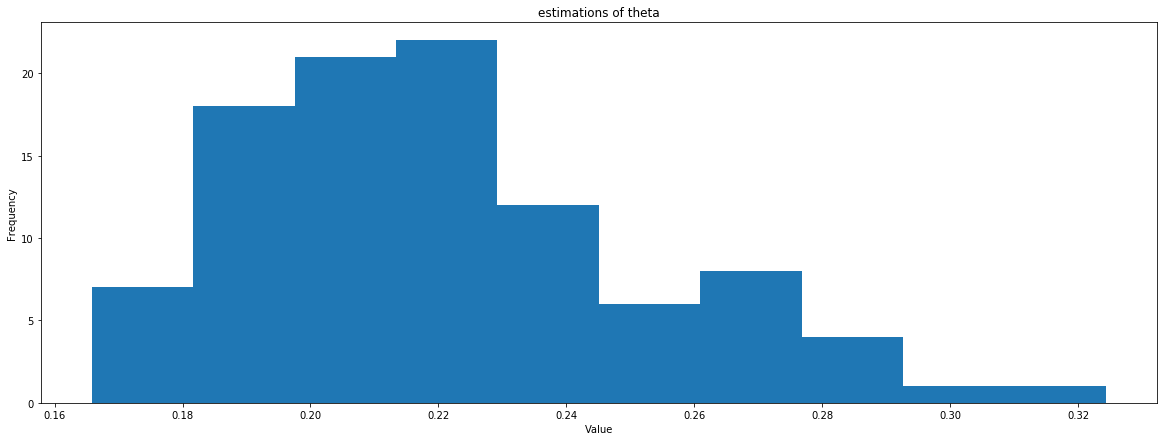

In [11]:
plt.figure(figsize=(20,7))
plt.hist(estimation)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("estimations of theta")
plt.show()

In [28]:
from statsmodels.distributions import empirical_distribution
deviation = []
for i in range(N_splits):
    train, test = splits[0][i], splits[0][i]
    theta = estimation[i]
    emp_CDF = empirical_distribution.ECDF(test)
    dev = np.mean([(emp_CDF(x) - (1-sps.laplace.cdf(theta, x)))**2 for x in test])
    deviation.append(dev)
print(np.mean(deviation))

0.013439470789


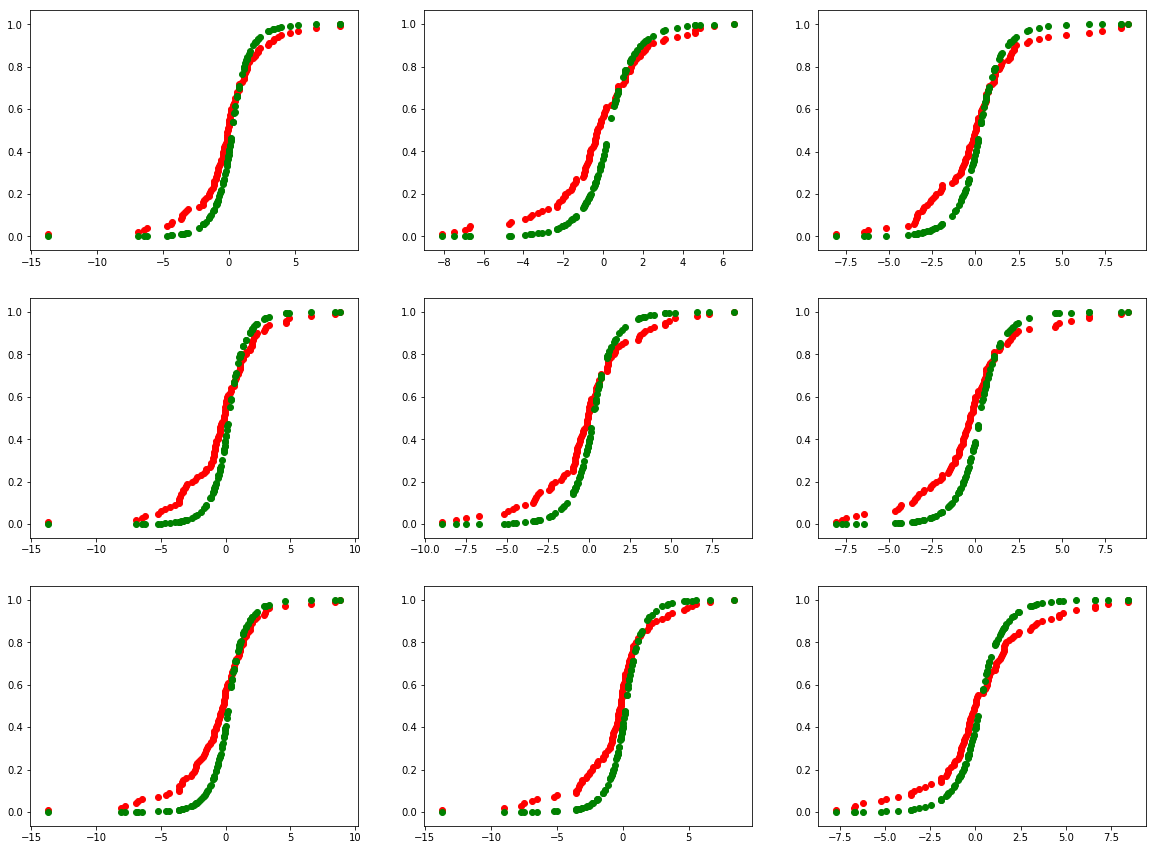

In [30]:
splits = [[],[]]
estimation = []
N_splits = 9
for i in range(N_splits):
    train, test = train_test_split(sample, test_size=0.5, random_state = i)
    splits[0].append(train)
    splits[1].append(test)
    estimation.append(2 / np.var(train))

deviation = []
plt.figure(figsize=(20,15))
for i in range(N_splits):
    train, test = splits[0][i], splits[0][i]
    theta = estimation[i]
    emp_CDF = empirical_distribution.ECDF(test)
    deviation.append(dev)
    
    plt.subplot(3,3,i + 1)
    plt.scatter(test,emp_CDF(test), c="r")
    plt.scatter(test, 1 -sps.laplace.cdf(theta,test), c="g")

Полученное по 100 сплитам среднеквадратичное отклонение эмперически построенной функции распределения от функции распределения параметром, оцененным по второй части выборки: 0.01 исходя из малой величины выборки считаю, что семейство распределений определено верно

Данный критерий оценивает "похожесть" функции предпологаемой распределения с оцененным параметром на train выборке и сравнивает с эмпиррическим распределением на test выборке для 100 различных сплитов. Так как среднеквадратичное отклонение получилось около 0,01, то я предположила, что гипотезу $H_0$ отвергнуть нельзя, визуальная проверка на девяти рандомных сплитах показала аналогичный результат 